<a href="https://colab.research.google.com/github/DieKim/SBA-Elice_Project_NLP/blob/main/sba_project_emoing/Basic_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3-1. 모델 설정

감정 분류를 위한 딥러닝 모델로 LSTM을 사용하여 2개의 layer를 쌓고 6개를 출력을 갖는 softmax 층으로 구성합니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [ ]:
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 # 10376
embedding_dim = 256

In [ ]:
# ## 기본모델, 임베딩 레이어 위에 LSTM모델이 두 층, 그 위에 덴스레이어가 위치하도록 모델을 디자인해주세요
# model = Sequential()
# model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length)) 
# # LSTM 2개 쌓는 것 구글링 필요
# model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.4))
# # dropout - https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/ 
# # recurrent_dropout - https://stackoverflow.com/questions/43843538/prevent-over-fitting-of-text-classification-using-word-embedding-with-lstm 
# model.add(Dropout(0.5))
# model.add(LSTM(units=64, dropout=0.5, recurrent_dropout=0.3))
# # 6개로 분류해야 하므로, 6개 각각 확률을 구해야 하므로 unit=6
# # 수업 시간에는 긍정/부정만 분류하면 되므로 1개만 썼다. 근데 수업 시간 예제도 units=2로 할 수도 있다.
# model.add(Dense(units=6, activation='softmax'))
# # 이진분류는 sigmoid, 지금은 분류니까 1~6번 확률을 다 더하면 1이 나오도록.
# # sequence_lengh 쓰는 레이어가 있다! -> Embedding인듯...

# ## 모델구조보기
# print(model.summary())

##### 기본 LSTM
## 기본모델, 임베딩 레이어 위에 LSTM모델이 두 층, 그 위에 덴스레이어가 위치하도록 모델을 디자인해주세요
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length, mask_zero=True))
model.add(Dropout(0.25)) 
# LSTM 2개 쌓는 것 구글링 필요
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=6, activation='softmax'))
## 모델구조보기
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 35, 256)           2656512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 35, 50)            61400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 2,778,918
Trainable params: 2,778,918
Non-trainable params: 0
_________________________________________________________________
None


optimizer는 adam으로, loss는 6개 분류 이기에 sparse_categorical_crossentropy 으로 설정합니다. metrics은 accuracy로 설정합니다

In [ ]:
## 모델 compile option주기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']
)

### 3-2. 학습 수행

epochs는 10, batch_size는 64로 설정하고 train, val 데이터를 사용하여 학습을 수행합니다. 

In [ ]:
## 모델 학습하기
# X_val_pad, y_val을 가지고 validation성능을 확인하며 학습할 수 있도록 해주세요.
# Failed to find data adapter that can handle input 오류가 나서 np.asarray 사용.
# https://stackoverflow.com/questions/57874436/tensorflow-data-adapter-error-valueerror-failed-to-find-data-adapter-that-can 
X_train_pad = np.asarray(X_train_pad) 
y_train = np.asarray(y_train)
X_val_pad = np.asarray(X_val_pad) 
y_val = np.asarray(y_val)
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val))


Epoch 1/10
250/250 [==============================] - 19s 39ms/step - loss: 1.4182 - acc: 0.4344 - val_loss: 0.4694 - val_acc: 0.8400
Epoch 2/10
250/250 [==============================] - 8s 32ms/step - loss: 0.2759 - acc: 0.9057 - val_loss: 0.3209 - val_acc: 0.8825
Epoch 3/10
250/250 [==============================] - 8s 32ms/step - loss: 0.1439 - acc: 0.9483 - val_loss: 0.3333 - val_acc: 0.8905
Epoch 4/10
250/250 [==============================] - 8s 32ms/step - loss: 0.0906 - acc: 0.9664 - val_loss: 0.3512 - val_acc: 0.8915
Epoch 5/10
250/250 [==============================] - 8s 32ms/step - loss: 0.0706 - acc: 0.9758 - val_loss: 0.3640 - val_acc: 0.8855
Epoch 6/10
250/250 [==============================] - 8s 33ms/step - loss: 0.0571 - acc: 0.9783 - val_loss: 0.4129 - val_acc: 0.8860
Epoch 7/10
250/250 [==============================] - 8s 32ms/step - loss: 0.0471 - acc: 0.9829 - val_loss: 0.4111 - val_acc: 0.8825
Epoch 8/10
250/250 [==============================] - 8s 32ms/step -

학습 결과를 출력하면 다음과 같습니다.

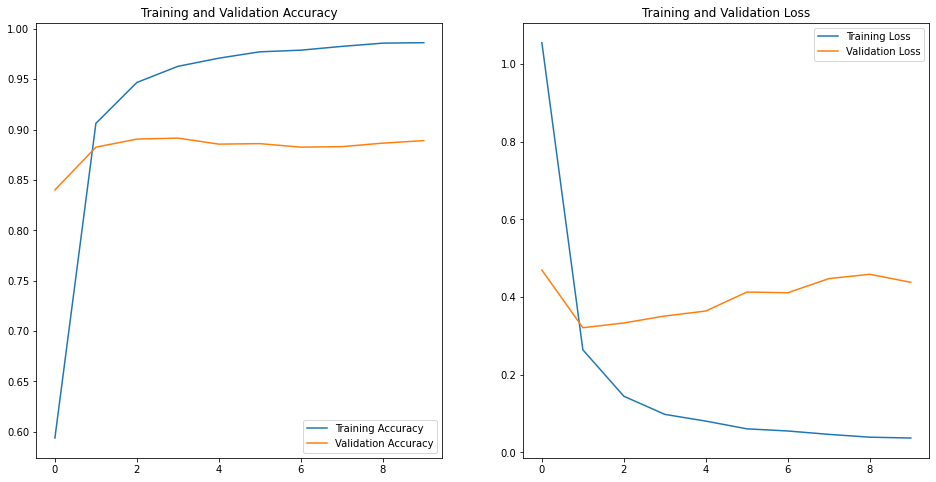

In [ ]:
# https://needneo.tistory.com/30 
# acc <-> accuracy KeyError
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 3-3. 평가 및 예측

학습된 결과를 바탕으로 test 데이터에서의 성능을 살펴봅시다.

In [ ]:
X_test_pad = np.asarray(X_test_pad)
y_test = np.asarray(y_test)
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

print('test set accuracy: ', test_accuracy)

63/63 [==============================] - 0s 5ms/step - loss: 0.5640 - acc: 0.8710
test set accuracy:  0.8709999918937683


test 데이터의 예측된 감정을 `test_prediction`에 저장하고 5개의 샘플을 출력해봅시다.

In [ ]:
## model에서 label 추측하기 (여러 클래스 예측할 때 어떤 method를 쓰는지 검색하여 찾아볼 것)
# predict_classes가 deprecated 되었다고 한다.
test_prediction = np.argmax(model.predict(X_test_pad), axis=-1)

In [ ]:
test_prediction

array([3, 3, 3, ..., 0, 2, 4])

In [ ]:
y_test

array([3, 3, 3, ..., 0, 0, 4])

In [ ]:
# 0번부터 4번까지 5개를 출력해보겠습니다.
for i in range(5): 
    
    # 사용하였습니다.
    test_prediction
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df_test['Sentence'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, test_prediction[i], df_test['Emotion'][i]))

0 번째 테스트 데이터 문장: 
im feeling rather rotten so im not very ambitious right now
0 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

1 번째 테스트 데이터 문장: 
im updating my blog because i feel shitty
1 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

2 번째 테스트 데이터 문장: 
i never make her separate from me because i don t ever want her to feel like i m ashamed with her
2 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

3 번째 테스트 데이터 문장: 
i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

4 번째 테스트 데이터 문장: 
i was feeling a little vain when i did this one
4 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3



마지막으로 confusion matrix를 사용하여 accuracy에서 알 수 없었던 오분류 정보에 대해서 살펴봅니다.

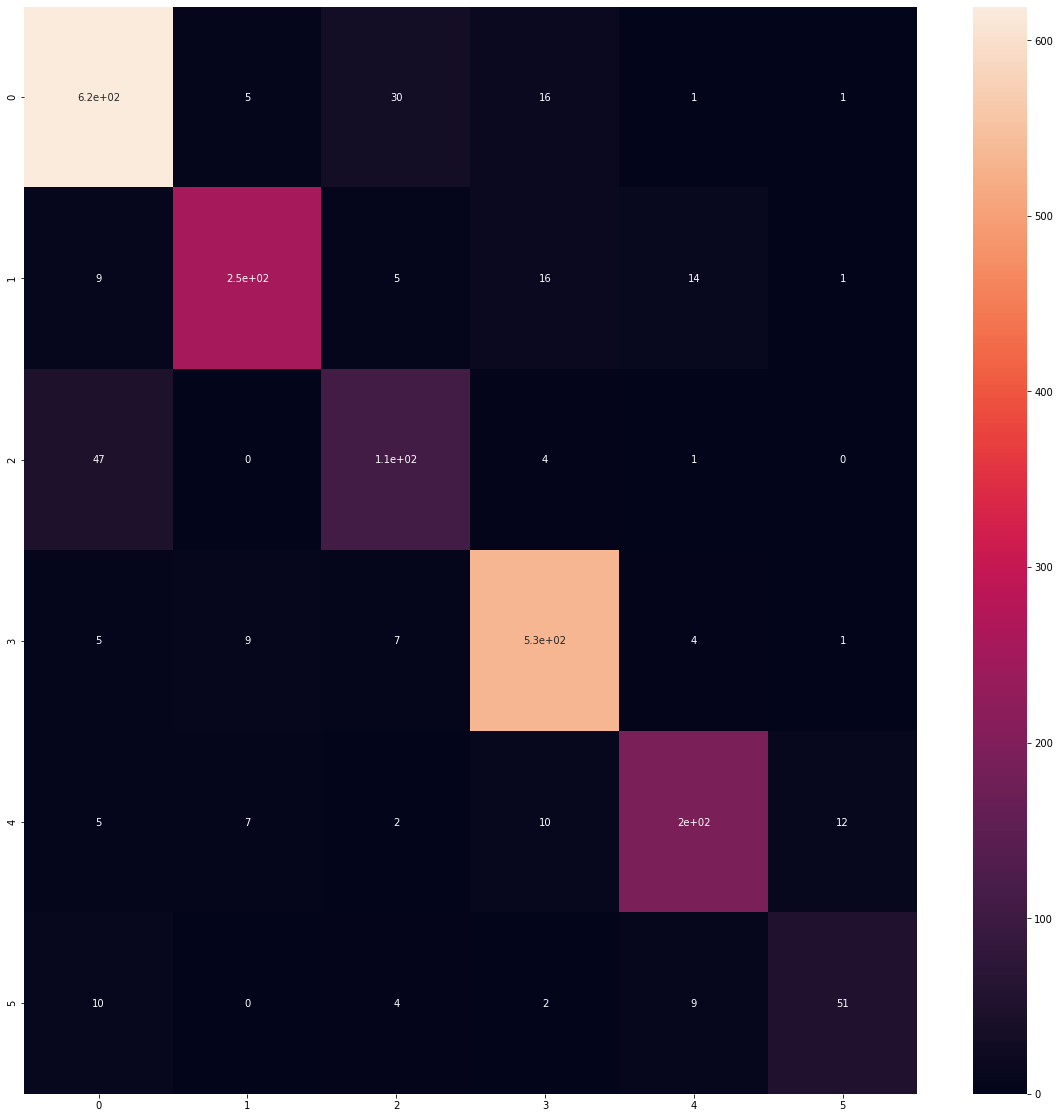

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_prediction, y_test)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

### 감정 맞추기

In [ ]:
user_input = input()
small_df = pd.DataFrame({"Sentence":user_input}, columns=['Sentence'], index=[0])
# 전처리
stemming_sentence_small_feature = []

for sentence in small_df['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    word_token = [token for token in word_tokenize(sentence) if token not in stop_words]
    word_token = [stemmer.stem(token) for token in word_token]
    stemming_sentence_small_feature.append(word_token)

## stemming_sentence_val, test를 bow로 표현하기
X_small_feature=tokenizer.texts_to_sequences(stemming_sentence_small_feature)

## X_vala과 X_test를 padding을 붙여 일정길이로 만들어주기
X_small_pad_feature = [(x_list + 35 * [0])[:35] for x_list in X_small_feature]
score_prediction = np.argmax(model.predict(X_small_pad_feature), axis=-1)
emotions = {0:'joy',1:'anger',2:'love',3:'sadness',4:'fear',5:'surprise'}
print("RNN says it is ", emotions[score_prediction[0]])

What a cute puppy!
RNN says it is  joy
